In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import warnings
import seaborn as sns

In [3]:
warnings.filterwarnings(action = 'ignore')

<h1> Part 1 </h1> 


Preparation the dataset and subsample

Dataset is taken from: https://www.kaggle.com/ronitf/heart-disease-uci/version/1

Dataset name: Heart Disease Data Set

In [5]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df = df[['age', 'trestbps', 'chol', 'thalach']]
df.head(10)

,age,trestbps,chol,thalach
0,69,160,234,131
1,69,140,239,151
2,66,150,226,114
3,65,138,282,174
4,64,110,211,144
5,64,170,227,155
6,63,145,233,150
7,61,134,234,145
8,60,150,240,171
9,59,178,270,145


<h1>Part 2</h1>

Parametric Estimation of PDF

In [9]:
def cut_tails(array):
    array_cut = []
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25
    
    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)
    
    for data in array:
        if data < max_dist and data > min_dist:
            array_cut.append(data)
    return array_cut

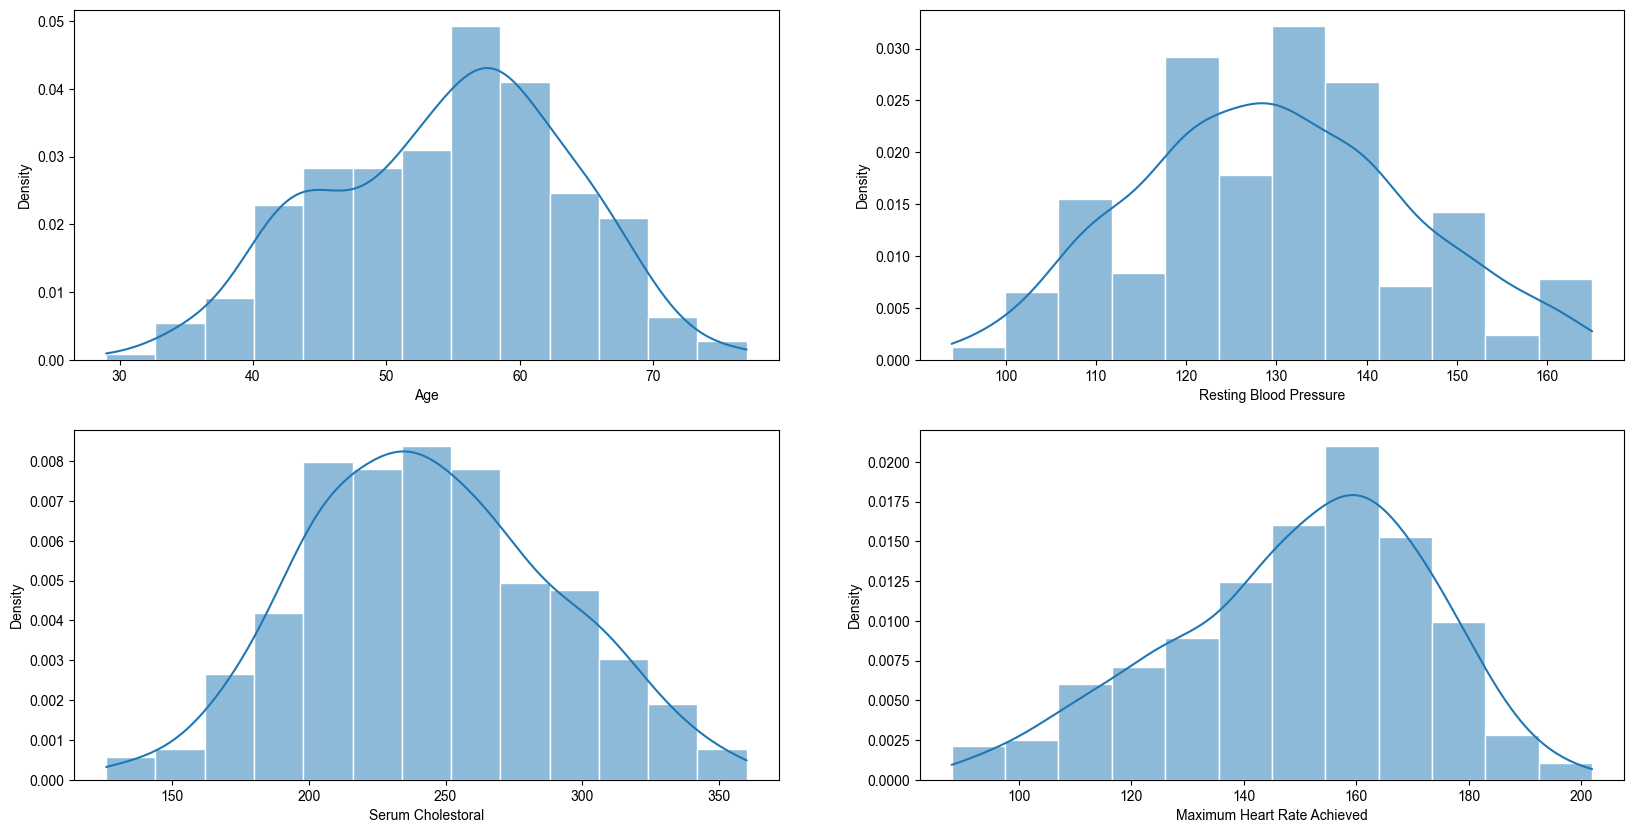

In [10]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='darkgrid', palette='muted')

age = sns.histplot(cut_tails(df.age), ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(cut_tails(df.trestbps), ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(cut_tails(df.chol), ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(cut_tails(df.thalach), ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

<h1>Part 3</h1>

Estimation of Order Statistics

In [12]:
def return_quantile(array):
    return np.array([
        np.quantile(array, 0.1),
        np.quantile(array, 0.25),
        np.quantile(array, 0.5),
        np.quantile(array, 0.75),
        np.quantile(array, 0.9)
    ])

def plot_box(array, label):
    figure, ax = plt.subplots(2, 1, figsize=(10, 10))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    histplot = sns.histplot(array, ax=ax[0], kde=False, stat='density')
    boxplot = sns.boxplot(array, ax=ax[1], linewidth=0.5)
    
    histplot.set(xlabel=label)
    boxplot.set(xlabel=label)
    
    quantiles = return_quantile(array)
    for quantile in quantiles:
        ax[0].axvline(quantile, color='black', linestyle='--', alpha=0.75)
        ax[1].axvline(quantile, color='black', linestyle='--', alpha=0.75)
    
    plt.show()


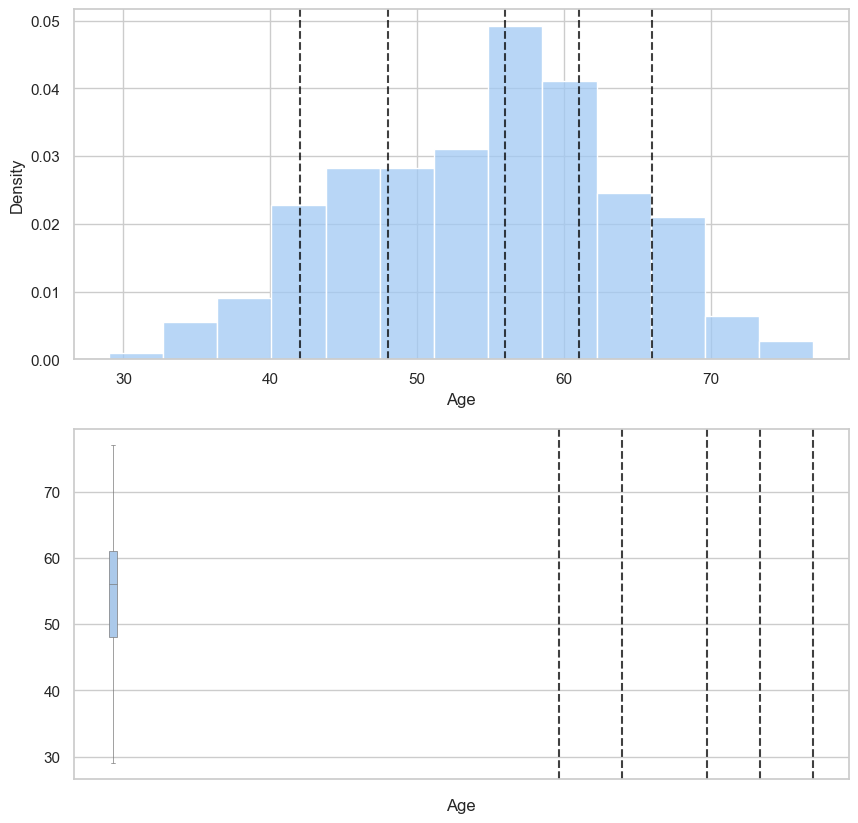

In [67]:
plot_box(cut_tails(df.age), 'Age')

In [49]:
print(return_quantile(df.age))
pd.Series(cut_tails(df.age)).describe()

[42. 48. 56. 61. 66.]


count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
dtype: float64

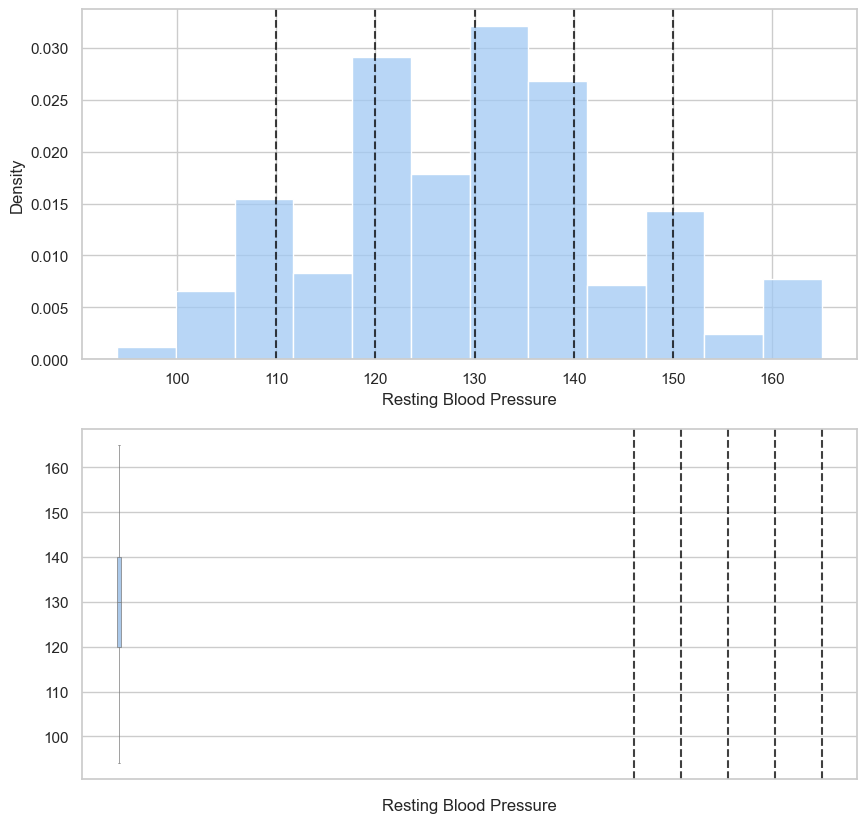

In [50]:
plot_box(cut_tails(df.trestbps), 'Resting Blood Pressure')

In [33]:
print(return_quantile(df.trestbps))
pd.Series(cut_tails(df.trestbps)).describe()

[110.  120.  130.  140.  152.8]


count    284.000000
mean     129.573944
std       14.948846
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
dtype: float64

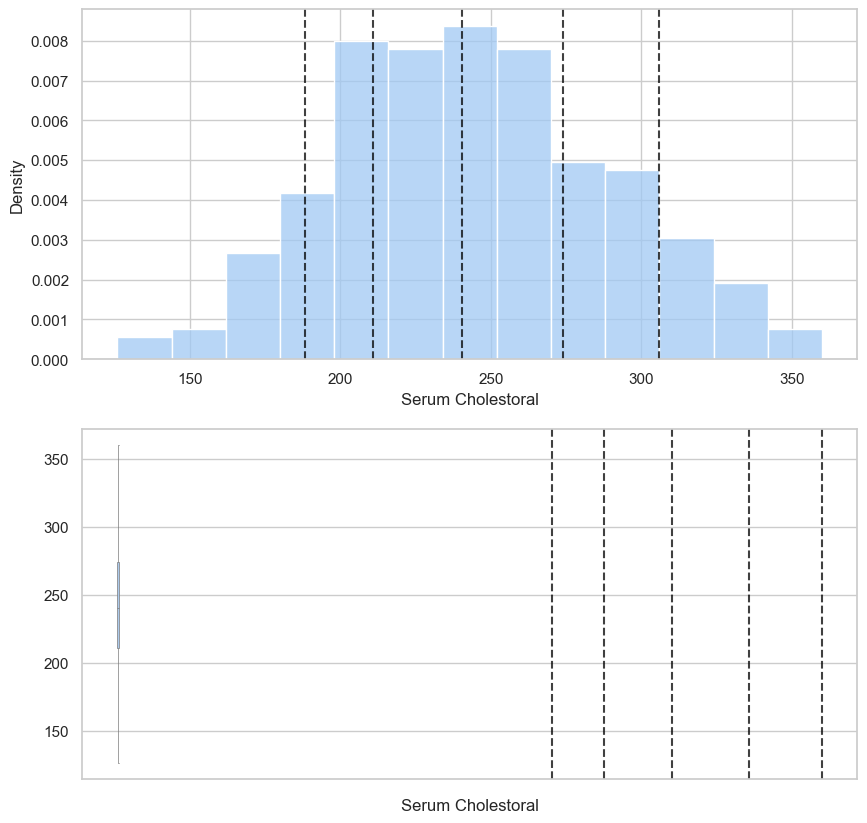

In [34]:
plot_box(cut_tails(df.chol), 'Serum Cholestoral')

In [35]:
print(return_quantile(df.chol))
pd.Series(cut_tails(df.chol)).describe()

[190.4 211.  243.  276.  309. ]


count    292.000000
mean     244.082192
std       45.218752
min      126.000000
25%      211.000000
50%      240.500000
75%      274.000000
max      360.000000
dtype: float64

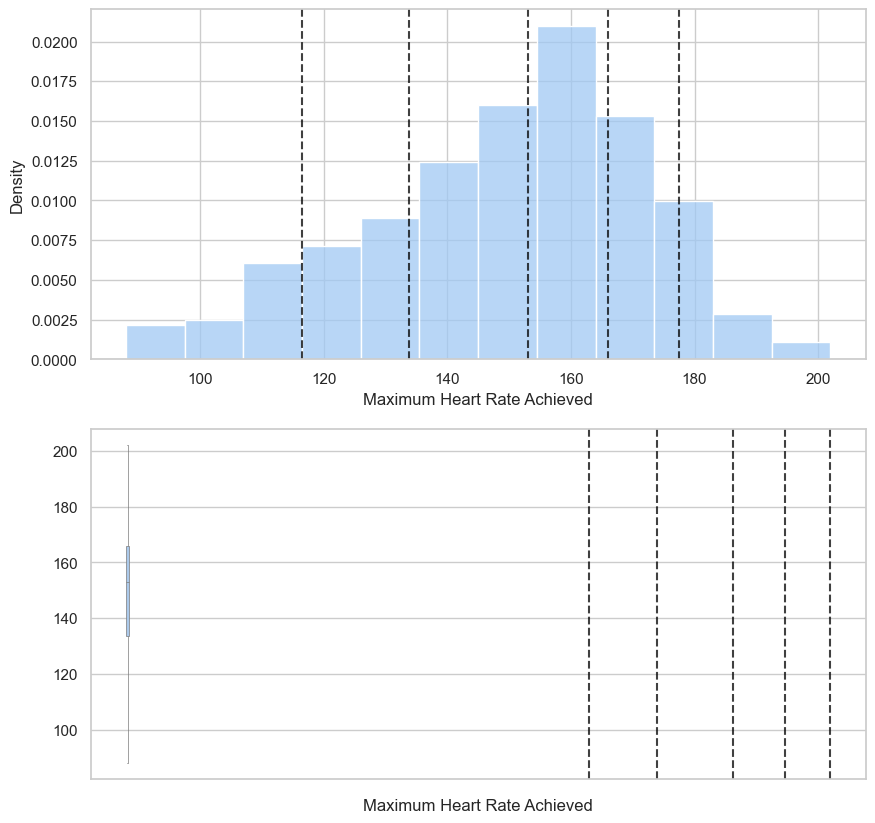

In [36]:
plot_box(cut_tails(df.thalach), 'Maximum Heart Rate Achieved')

In [37]:
print(return_quantile(df.thalach))
pd.Series(cut_tails(df.thalach)).describe()

[116.  133.  153.  166.  177.4]


count    296.000000
mean     149.864865
std       22.518587
min       88.000000
25%      133.750000
50%      153.000000
75%      166.000000
max      202.000000
dtype: float64

<h1>Part 4</h1>

Identification of Theoretical Distributions

In [23]:
def return_distplot(array, label):
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    subplot = sns.histplot(array, kde=False, stat='density')
    subplot.set(xlabel=label)
    
    for distribution in ([scipy.stats.norm, scipy.stats.alpha, scipy.stats.gamma,
                          scipy.stats.laplace, scipy.stats.beta]):
        
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        args = distribution.fit(array)
        print('Distribution', type(distribution).__name__, 'arguments:', args)
        y_plot = distribution.pdf(x_plot, *args)
        
        sns.lineplot(x=x_plot, y=y_plot, label=type(distribution).__name__)
        plt.legend()


Distribution norm_gen arguments: (54.54208754208754, 9.034487589926636)
Distribution alpha_gen arguments: (23.309335720263732, -159.50238740411947, 4977.935493801289)
Distribution gamma_gen arguments: (365.7207122748242, -119.40222832913827, 0.4755474746723076)
Distribution laplace_gen arguments: (56.0, 7.383838383838384)
Distribution beta_gen arguments: (5.899495413105845, 4.465598093945946, 19.6470266008427, 61.28284741999197)


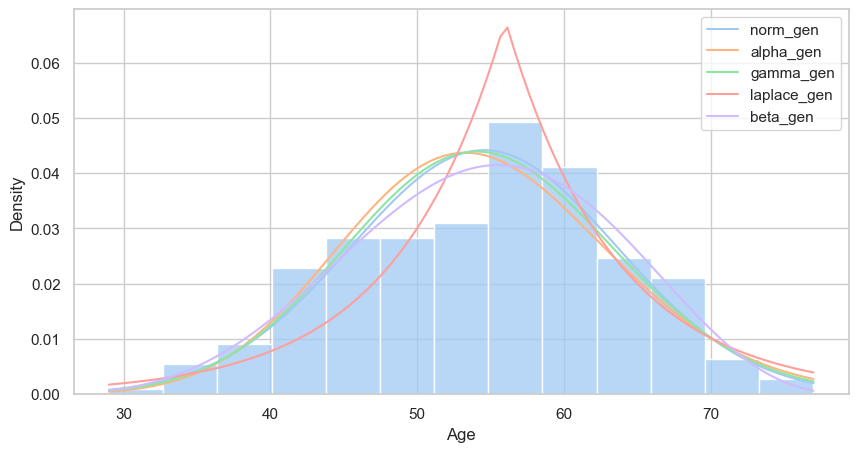

In [43]:
return_distplot(cut_tails(df.age), 'Age')

Blood Pressure Estimation

Distribution norm_gen arguments: (129.57394366197184, 14.922504885345626)
Distribution alpha_gen arguments: (19.695899846344382, -165.38042150749953, 5793.548224921315)
Distribution gamma_gen arguments: (124.41558888814552, -37.051796993603105, 1.3391920300662719)
Distribution laplace_gen arguments: (130.0, 11.982394366197184)
Distribution beta_gen arguments: (3.4569994181124732, 3.791287120069, 88.60471518499043, 85.97820438950293)


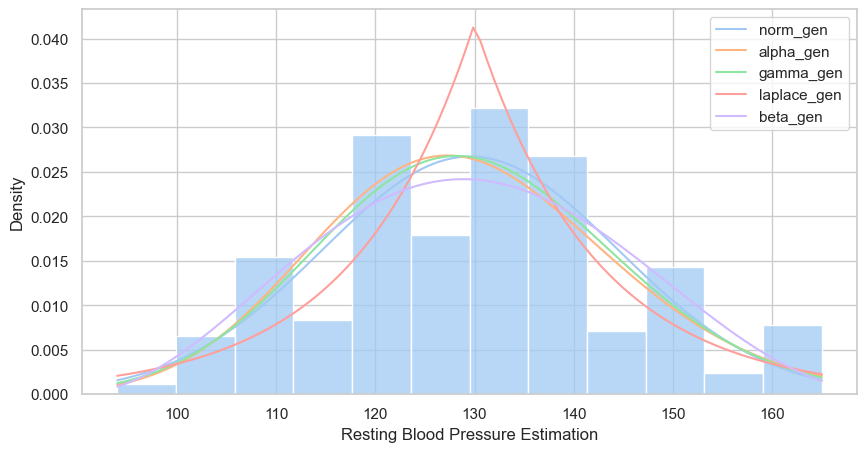

In [44]:
return_distplot(cut_tails(df.trestbps), 'Resting Blood Pressure Estimation')

Distribution norm_gen arguments: (244.08219178082192, 45.141255748356876)
Distribution alpha_gen arguments: (16.553180321914596, -509.7624619016076, 12432.690159265432)
Distribution gamma_gen arguments: (101.85030690661486, -211.83977849200178, 4.476392739068697)
Distribution laplace_gen arguments: (240.5, 36.56849315068493)
Distribution beta_gen arguments: (5.964273790681618, 7.1167205464808925, 89.17133594611951, 339.8516354171293)


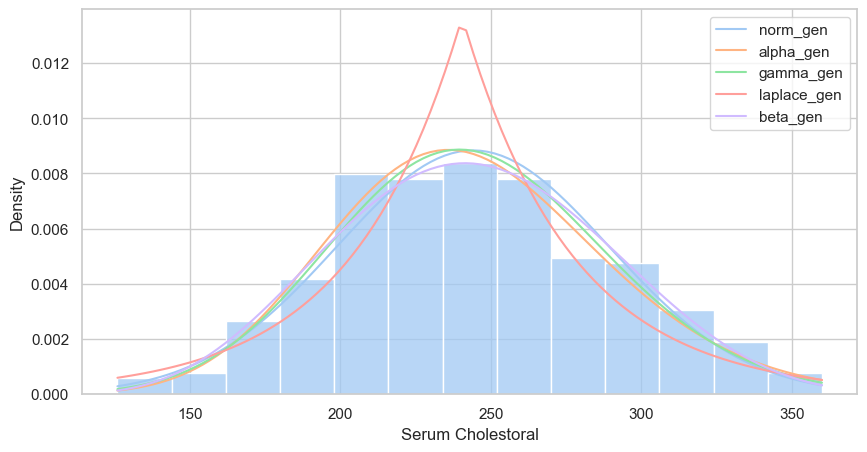

In [68]:
return_distplot(cut_tails(df.chol), 'Serum Cholestoral')

Distribution norm_gen arguments: (149.86486486486487, 22.480516684167736)
Distribution alpha_gen arguments: (20.526832877993755, -321.34830513113275, 9649.945147634666)
Distribution gamma_gen arguments: (286.01856435866375, -237.45483164396245, 1.3532735956518263)
Distribution laplace_gen arguments: (153.0, 18.08783783783784)
Distribution beta_gen arguments: (12.493241876541987, 4.9494354741930575, -2.6308239385754306, 212.88473004875323)


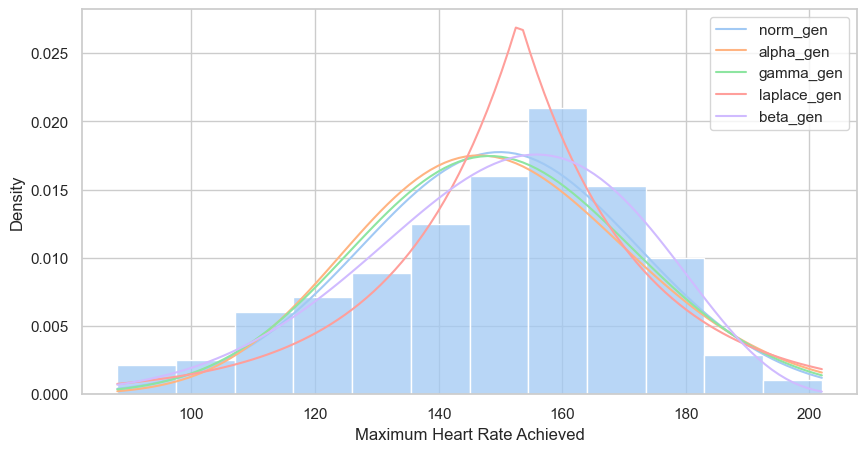

In [69]:
return_distplot(cut_tails(df.thalach), 'Maximum Heart Rate Achieved')

<h1>Part 5</h1>

Parameter Estimation



In [18]:
array = cut_tails(df.age)
mle = scipy.stats.beta.fit(array, method='MLE')

print('Distribution', type(scipy.stats.beta).__name__, 'arguments:', mle)

def function(x, a, b):
    return getattr(scipy.stats.distributions, 'beta').pdf(x, a, b)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution beta_gen arguments: (5.899495413105845, 4.465598093945946, 19.6470266008427, 61.28284741999197)
Maximum Likelihood Estimation: 5.899, 4.466
LS Method: 1.269, 66.817


In [19]:
array = cut_tails(df.trestbps)
mle = scipy.stats.gengamma.fit(array, method='MLE')

print('Distribution', type(scipy.stats.gengamma).__name__, 'arguments:', mle)

def function(x, a, c):
    return getattr(scipy.stats.distributions, 'gengamma').pdf(x, a, c)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution gengamma_gen arguments: (81.54267909182303, 1.021145829701972, -8.002845892163803, 1.8484133349840433)
Maximum Likelihood Estimation: 81.543, 1.021
LS Method: 0.238, 0.916


In [20]:
array = cut_tails(df.chol)
mle = scipy.stats.norm.fit(array, method='MLE')

print('Distribution', type(scipy.stats.norm).__name__, 'arguments:', mle)

def function(x, a, b):
    return getattr(scipy.stats.distributions, 'beta').pdf(x, a, b)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution norm_gen arguments: (244.08219178082192, 45.141255748356876)
Maximum Likelihood Estimation: 244.082, 45.141
LS Method: 1.972, 502.498


In [17]:
array = cut_tails(df.thalach)
mle = scipy.stats.beta.fit(array, method='MLE')

print('Distribution', type(scipy.stats.beta).__name__, 'arguments:', mle)

def function(x, loc, scale):
    return getattr(scipy.stats.distributions, 'beta').pdf(x, loc, scale)

xdata, ydata = np.histogram(array, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm')

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
print('LS Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution beta_gen arguments: (12.493241876541987, 4.9494354741930575, -2.6308239385754306, 212.88473004875323)
Maximum Likelihood Estimation: 12.493, 4.949
LS Method: 1.471, 195.206


<h1>Part 6</h1>

Validation Using QQ plots


In [21]:
def return_biplot(array, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    args = distribution.fit(array)
    print('Distribution', type(distribution).__name__, 'arguments:', args)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

Distribution beta_gen arguments: (5.899495413105845, 4.465598093945946, 19.6470266008427, 61.28284741999197)


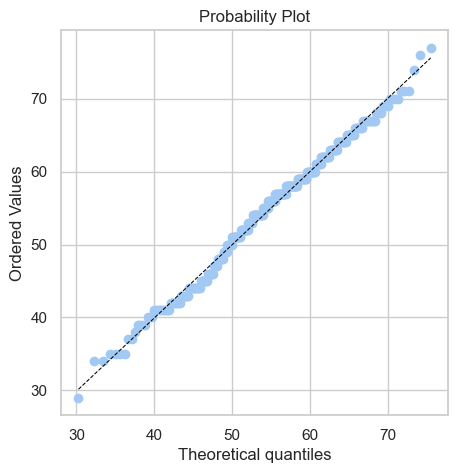

In [77]:
return_biplot(cut_tails(df.age), distribution=scipy.stats.beta)

Distribution gengamma_gen arguments: (81.54267909182303, 1.021145829701972, -8.002845892163803, 1.8484133349840433)


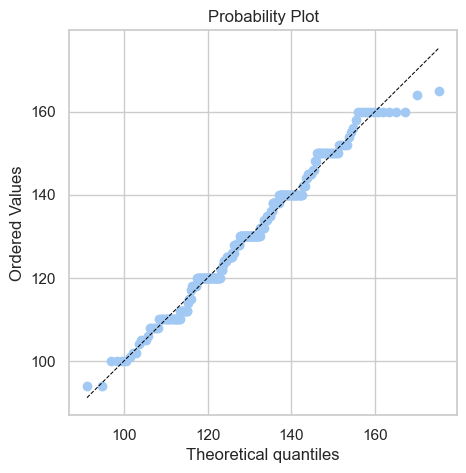

In [78]:
return_biplot(cut_tails(df.trestbps), distribution=scipy.stats.gengamma)

Distribution norm_gen arguments: (244.08219178082192, 45.141255748356876)


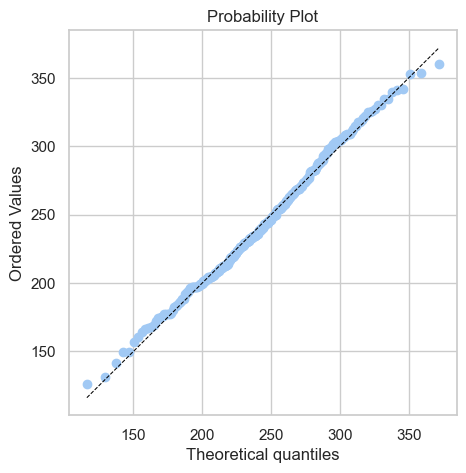

In [79]:
return_biplot(cut_tails(df.chol), distribution=scipy.stats.norm)

Distribution beta_gen arguments: (12.493241876541987, 4.9494354741930575, -2.6308239385754306, 212.88473004875323)


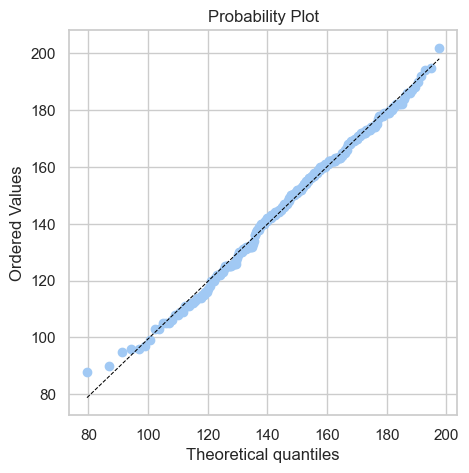

In [80]:
return_biplot(cut_tails(df.thalach), distribution=scipy.stats.beta)

<h1>Part 7</h1>

Goodness- of – Fit Assessment

In [81]:
def return_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    cramervonmises = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.5f}'.format(kstest))
    print('Cramer–Von Mises Test: {:.5f}'.format(cramervonmises))

In [82]:
return_test(cut_tails(df.age), distribution=scipy.stats.beta, cdf='beta')

Kolmogorov-Smirnov Test: 0.19528
Cramer–Von Mises Test: 0.39902


In [83]:
return_test(cut_tails(df.trestbps), distribution=scipy.stats.gengamma, cdf='gengamma')

Kolmogorov-Smirnov Test: 0.08274
Cramer–Von Mises Test: 0.22247


In [84]:
return_test(cut_tails(df.chol), distribution=scipy.stats.norm, cdf='norm')

Kolmogorov-Smirnov Test: 0.71089
Cramer–Von Mises Test: 0.61523


In [85]:
return_test(cut_tails(df.thalach), distribution=scipy.stats.beta, cdf='beta')

Kolmogorov-Smirnov Test: 0.67581
Cramer–Von Mises Test: 0.59543
